# Practice Session Linear SVM

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import cvxpy as cp
from cvxpy import *

## 1 - Synthetic Data
***

### Question 1

In [2]:
from utility_svm import gen_data_twogaussians_2d
import numpy as np
# class 1
n1 = 300
mu1 = np.array([0, 2]); S1 = 1.5*np.array([[1, 0.1], [0.1, 1]])
# class 2
n2 = n1
mu2 = np.array([-2, -2]); S2 = 3.5*np.array([[1, -0.25], [-0.25, 1/2]])
Xtrain, Ytrain = gen_data_twogaussians_2d(mu1, S1, mu2, S2, n1, n2)

### Question 2

In [3]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xtrain, Ytrain, shuffle=
True, test_size=1/3, stratify=Ytrain)
Xtrain, Xval, Ytrain, Yval = train_test_split(Xtrain, Ytrain, shuffle=
True, test_size=1/2, stratify=Ytrain)

*Answer* : Shuffle permet de tirer aléatoirement les variables. En effet, cela évite de prendre des données déjà triées.

Shuffle = tirage aléatoire pour préserver les mêmes statistiques dans Train-valid et Test.

Stratify = préserver la proportion de chaque classe (0,1) dans Train-Valid et Test.


In [4]:
print("Dimension of Training=",Xtrain.shape)
print("Dimension of Validation=",)
print("Dimension of Test=",Xtest.shape)

Dimension of Training= (200, 2)
Dimension of Validation=
Dimension of Test= (200, 2)


### Question 3 

##### Learn a linear SVM using the training set.

In [5]:
from sklearn.svm import SVC
# define a linear SVM with C = 1
C = 1
clf_svm = SVC(kernel="linear", C = C) # we seek a linear svm (kernel ="linear")
# fit the parameters of the model
clf_svm.fit(Xtrain, Ytrain)

SVC(C=1, kernel='linear')

##### Plot the decision frontier. Comment on the results.

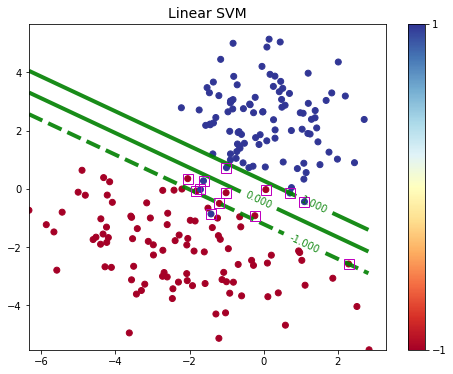

In [6]:
# plot the decision boundary
import matplotlib.pyplot as plt
from utility_svm import plot_decision_regions_2d
plot_decision_regions_2d(Xtrain, Ytrain, clf_svm, resolution=0.02,title="Linear SVM")
plt.plot(clf_svm.support_vectors_[:,0], clf_svm.support_vectors_[:,1], "sm", ms=10, mfc="None")

##### What is the validation error rate ?

In [7]:
from sklearn.metrics import accuracy_score
val_err_rate = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
print('The validation error rate is :', val_err_rate)

train_err_rate = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))
print('The training error rate is :', train_err_rate)

The validation error rate is : 0.03500000000000003
The training error rate is : 0.020000000000000018


### Question 4

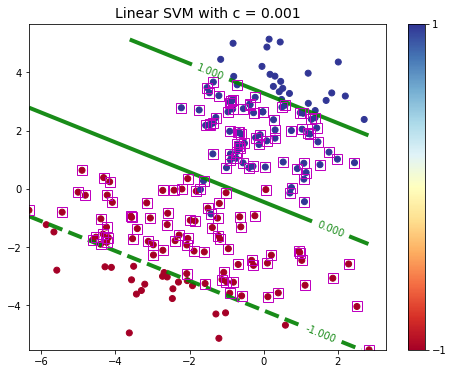

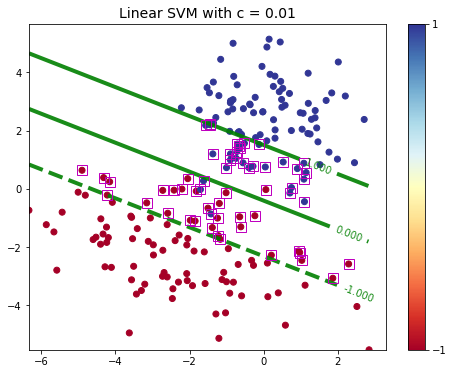

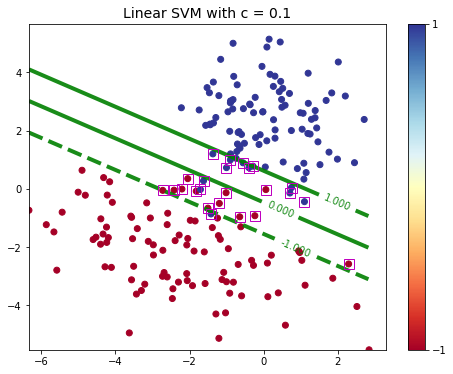

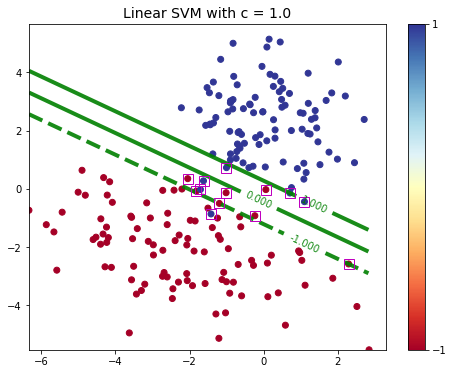

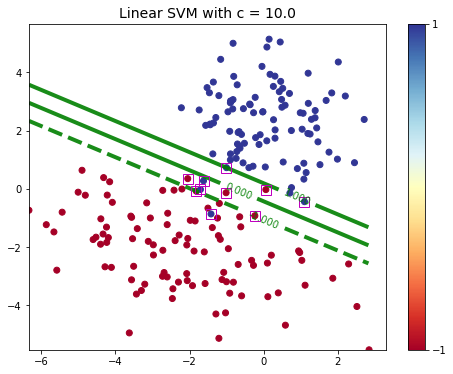

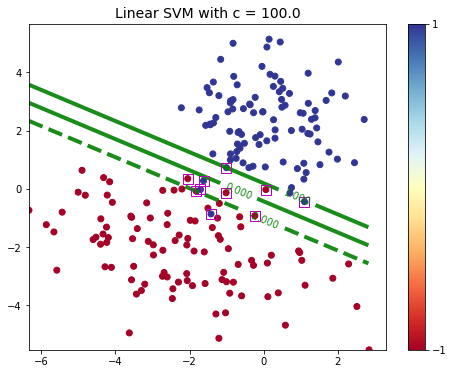

In [8]:
C=5
vectC = np.logspace(-3, 2, 6) #vector of C in logarithmic scale
for C in vectC:
    clf_svm.C = C
    clf_svm.fit(Xtrain, Ytrain)
    plot_decision_regions_2d(Xtrain, Ytrain, clf_svm, resolution=0.02, title="Linear SVM with c = {}".format(C))
    plt.plot(clf_svm.support_vectors_[:,0], clf_svm.support_vectors_[:,1], "sm", ms=10, mfc="None")

### Question 5

In [9]:
# Select C by cross-validation
vectC = np.logspace(-3, 2, 10)
val_err_rate = np.empty(vectC.shape[0])
train_err_rate = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    # learn the SVM for C
    clf_svm = SVC(kernel="linear", C = C) # we seek a linear svm (kernel ="linear")
    clf_svm.fit(Xtrain, Ytrain)
    
    # compute the classification error rates
    val_err_rate [ind_C] = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
    train_err_rate[ind_C] = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))

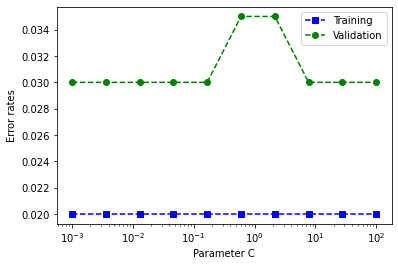

In [10]:
# Error curves
plt.figure()
plt.semilogx(vectC, train_err_rate, "bs--", label="Training")
plt.semilogx(vectC, val_err_rate, "go--", label="Validation")
plt.xlabel("Parameter C")
plt.ylabel("Error rates")
plt.legend(loc="best")

In [11]:
ind_min = val_err_rate.argmin()
Copt = vectC[ind_min]
print("\n Optimal C = {}".format(Copt))


 Optimal C = 0.001


### Question 6

In [12]:
# Fit the optimal SVM using Copt
clf_svm = SVC(kernel="linear", C = Copt) # we seek a linear svm (kernel ="linear")
clf_svm.fit(Xtrain, Ytrain)

# compute and print the performances on train, validation and test sets
err_val = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
err_test = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))

print("Optimal Linear SVM : test error rate = {}".format(err_val))
print("Optimal Linear SVM : test error rate = {}".format(err_test))

Optimal Linear SVM : test error rate = 0.030000000000000027
Optimal Linear SVM : test error rate = 0.020000000000000018


## 2 - Spam Classification
***

### Question 1

In [13]:
import numpy as np
dataspam = np.loadtxt("spambase.data", delimiter=",")
features_name = np.genfromtxt("spambase_variables.csv", delimiter=",", dtype="str")
features_name = features_name[:,0]
# get the inputs
X = dataspam[:,0:57]
# extract the output
Y = dataspam[:,-1]

### Question 2 : Split the data into training and test sets.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, shuffle=True, test_size =0.33, stratify=Y)

### Question 3

##### Split your current training set in halves (respectively the new training set and a validation one).

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, shuffle=True, test_size=1/2, stratify=Y_train)

##### Normalize the data by centering and scaling the variables.

In [16]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler(with_mean=True, with_std=True)
sc = sc.fit(X_train)
X_train = sc.transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

##### Learn a linear SVM model

In [17]:
C=5
vectC = np.logspace(-3, 2 , 10) #vector of C in logarithmic scale
for C in vectC:
    clf_svm.C = C
    clf_svm.fit(X_train, Y_train)


In [18]:
val_err_rate = np.empty(vectC.shape[0])
train_err_rate = np.empty(vectC.shape[0])
for ind_C, C in enumerate(vectC):
    # learn the SVM for C
    clf_svm = SVC(kernel="linear", C = C) # we seek a linear svm (kernel ="linear")
    clf_svm.fit(Xtrain, Ytrain)
    
    # compute the classification error rates
    val_err_rate [ind_C] = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
    train_err_rate[ind_C] = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))

In [19]:
ind_min = val_err_rate.argmin()
Copt = vectC[ind_min]
print("\n Optimal C = {}".format(Copt))


 Optimal C = 0.001


##### Evaluate the accuracy performances of your SVM

In [20]:
# Fit the optimal SVM using Copt
clf_svm = SVC(kernel="linear", C = Copt) # we seek a linear svm (kernel ="linear")
clf_svm.fit(Xtrain, Ytrain)

# compute and print the performances on train, validation and test sets
err_val = 1 - accuracy_score(Yval, clf_svm.predict(Xval))
err_test = 1 - accuracy_score(Ytrain, clf_svm.predict(Xtrain))

print("Optimal Linear SVM : test error rate = {}".format(err_val))
print("Optimal Linear SVM : test error rate = {}".format(err_test))

Optimal Linear SVM : test error rate = 0.030000000000000027
Optimal Linear SVM : test error rate = 0.020000000000000018


## 3 - Multi-class SVM : digits classification

### Question 1

In [21]:
import numpy as np
# training set
mnist_train = np.loadtxt("mnist-app.csv", delimiter=",")
Y_train = mnist_train[:,-1]
X_train = mnist_train[:, 0:784]
# test set
mnist_test = np.loadtxt("mnist-test.csv", delimiter=",")
Y_test = mnist_test[:,-1]
X_test = mnist_test[:, 0:784]

### Question 2

In [22]:
digits = [0, 2, 8]
# squeeze the training to the selected digits
index_train = np.argwhere((Y_train == digits[0]) | (Y_train == digits[1]) | (Y_train == digits[2]))
X_train = X_train[np.squeeze(index_train), :]
Y_train = Y_train[np.squeeze(index_train)]

# squeeze the test set as well
index_test = np.argwhere((Y_test == digits[0]) | (Y_test == digits[1]) |(Y_test == digits[2]))
X_test = X_test[np.squeeze(index_test), :]
Y_test = Y_test[np.squeeze(index_test)]

### Question 3 

In [ ]:
C=5

clf_svm.C = C
clf_svm.fit(X_train, Y_train)
